Objective
What type of employees are leaving? Determine which employees are prone to leave next. Present your results in the presentation sheet’s presentation area.

Slide 1 : Title Page
Slide 2 : Intro to project
Slide 3 : Explaining dataset. Include that it was a clean dataset, no need to clean it up.
Slide 4 : Salary bar plot
Slide 5 : Promotion value counts
Slide 6 : 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Try:
1) Bar plot of salary to show which class of salary is more
2) Value counts of promotions to show most leaving employess have no promotion
3) Group satisfaction level to 3 groups to see which group is leaving or scatter plot or satisfaction - last evaluation to see whether their satisfaction has gone up or down
4) Work accident value_counts to show it isnt relevant
5) Department


end use conditional indexing on other dataset to find which employees are going to leave

In [4]:
##Read in whole dataset
emp_data = pd.ExcelFile('TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx')

##Employees who have left sheet
emp_left = emp_data.parse('Employees who have left')
emp_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


low       2172
medium    1317
high        82
Name: salary, dtype: int64

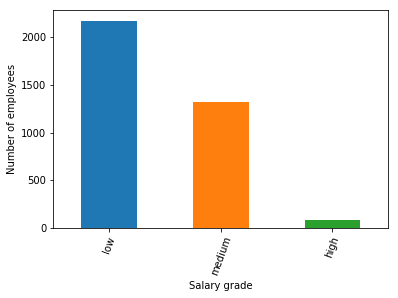

In [37]:
emp_left['salary'].value_counts().plot(kind = 'bar')
plt.xlabel('Salary grade')
plt.ylabel('Number of employees')
plt.xticks(rotation=70)
emp_left['salary'].value_counts()


In [9]:
emp_left['promotion_last_5years'].value_counts()

0    3552
1      19
Name: promotion_last_5years, dtype: int64

In [29]:
# ##Unsatisfied <= 0.34
# ##Okay >0.34 and <0.67
# ##Satisfied >= 0.67
# #emp_left['satisfaction_level'].astype(float)
# for i in emp_left['satisfaction_level']:
#     if i< 0.34:
#         emp_left['satisfaction'] = 'UnSatisfied'
#     elif (i>0.34) & (i<0.67):
#         emp_left['satisfaction'] = 'Okay'
#     else:
#         emp_left['satisfaction'] = 'satisfied'

In [41]:
emp_left.isnull().values.any()

False

In [42]:
del emp_left['satisfaction']
emp_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [57]:
emp_left['satisfaction_level'].astype(float)
emp_left['last_evaluation'].astype(float)

emp_left['satisfaction'] = emp_left['satisfaction_level'] - emp_left['last_evaluation']
negative = 0
positive = 0
for i in emp_left['satisfaction']:
    if i < 0:
        negative = negative + 1
    else:
        positive = positive + 1

        
print (negative)
print(positive)

3388
183


sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

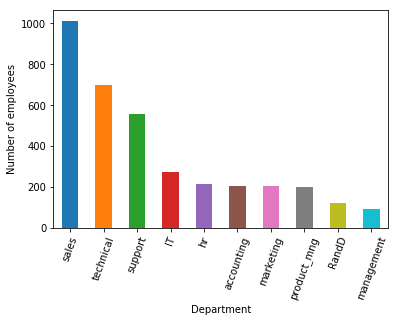

In [60]:
emp_left['dept'].value_counts().plot(kind = 'bar')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation = 70)
emp_left['dept'].value_counts()

In [64]:
print(emp_left['average_montly_hours'].min())
emp_left['average_montly_hours'].max()



126


310

In [73]:
#emp_left[['Work_accident','dept']]
#Employees which have had a work accdient
work = emp_left[emp_left['Work_accident']==1]
work['dept'].value_counts()

sales          46
technical      33
support        31
RandD          10
marketing      10
accounting      9
product_mng     9
IT              9
hr              7
management      5
Name: dept, dtype: int64

In [74]:
emp_left['Work_accident'].value_counts()

0    3402
1     169
Name: Work_accident, dtype: int64

In [76]:
emp_left['number_project'].value_counts()

2    1567
6     655
5     612
4     409
7     256
3      72
Name: number_project, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

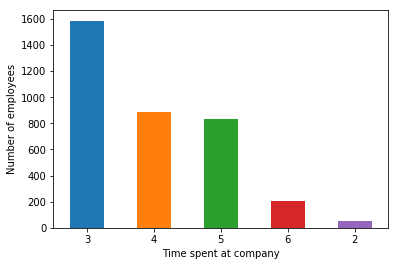

In [98]:
emp_left['time_spend_company'].value_counts().plot(kind = 'bar')
plt.xlabel('Time spent at company')
plt.ylabel('Number of employees')
plt.xticks(rotation = 0)

In [132]:
emp_current = emp_data.parse('Existing employees')
emp_current.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [143]:

no_promotion = emp_current['promotion_last_5years'] == 0


emp_current = emp_current[(emp_current['dept'] == 'sales') | (emp_current['dept'] == 'support') | (emp_current['dept']=='technical')]

emp_current = emp_current[emp_current['salary'] == 'low']
emp_current = emp_current[emp_current['promotion_last_5years']== 0 ]
emp_current = emp_current[(emp_current['time_spend_company'] == 3)|(emp_current['time_spend_company'] == 4)|emp_current[(emp_current['time_spend_company'] == 5)]


SyntaxError: unexpected EOF while parsing (<ipython-input-143-e35f342a01c0>, line 10)

In [147]:

no_promotion = emp_current['promotion_last_5years'] == 0


emp_current = emp_current[(emp_current['dept'] == 'sales') | (emp_current['dept'] == 'support') | (emp_current['dept']=='technical')]

emp_current = emp_current[emp_current['salary'] == 'low']
emp_current = emp_current[emp_current['promotion_last_5years']== 0 ]
emp_current = emp_current[(emp_current['time_spend_company'] == 3)|(emp_current['time_spend_company'] == 4)|(emp_current['time_spend_company'] == 5)]
emp_current


,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
5,2006,0.36,0.95,3,206,4,0,0,sales,low
7,2008,0.99,0.91,5,136,4,0,0,sales,low
8,2009,0.50,0.75,6,127,3,0,0,sales,low
9,2010,0.74,0.64,4,268,3,0,0,sales,low
30,2031,0.85,0.59,3,235,3,0,0,support,low
31,2032,0.67,0.57,2,160,4,0,0,support,low


In [113]:
low_salary = emp_current[emp_current['salary'] == 'low']
low_salary = low_salary[low_salary['promotion_last_5years'] == 0]

# department = emp_current['dept'].loc['sales']
# time_spent = emp_current['time_spend_company'].loc[[3,4,5]]
low_salary
#d[d['x'] > 2] and d[d['y'] > 7]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().